In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("genz.csv")

In [62]:
df.head()  # Shows first 5 rows


,User_ID,Age,Gender,Location,Education,Occupation,Primary_App,Secondary_Apps,Usage_Frequency,Daily_Usage_Time,Reason_for_Using,Satisfaction,Challenges,Desired_Features,Preferred_Communication,Partner_Priorities
0,1,20,Non-binary,Bangalore,Undergraduate,Freelancer,Hinge,Hinge,Monthly,1 hour,Finding a Partner,4,Safety Concerns,Audio Calls,Video Calls,Values > Personality > Appearance
1,2,24,Female,Delhi,Undergraduate,Part-time Job,Hinge,OkCupid,Weekly,30 minutes,Casual Dating,5,Time-Wasting,Video Calls,Text,Values > Personality > Appearance
2,3,24,Non-binary,Kolkata,Undergraduate,Intern,NaN,NaN,Weekly,2 hours,Casual Dating,4,Safety Concerns,Detailed Profiles,Text,Values > Personality > Appearance
3,4,22,Non-binary,Delhi,Graduate,Full-time Job,NaN,OkCupid,Daily,30 minutes,Casual Fun,3,NaN,AI Recommendations,Voice Notes,Personality > Interests > Values
4,5,18,Male,Delhi,Graduate,Intern,OkCupid,OkCupid,Weekly,2 hours,Casual Fun,4,Safety Concerns,Video Calls,Text,Appearance > Interests > Personality


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User_ID                  500 non-null    int64 
 1   Age                      500 non-null    int64 
 2   Gender                   500 non-null    object
 3   Location                 500 non-null    object
 4   Education                500 non-null    object
 5   Occupation               500 non-null    object
 6   Primary_App              393 non-null    object
 7   Secondary_Apps           386 non-null    object
 8   Usage_Frequency          500 non-null    object
 9   Daily_Usage_Time         500 non-null    object
 10  Reason_for_Using         500 non-null    object
 11  Satisfaction             500 non-null    int64 
 12  Challenges               383 non-null    object
 13  Desired_Features         500 non-null    object
 14  Preferred_Communication  500 non-null    o

In [64]:
df.duplicated().sum()
#Number of duplicates = 0

np.int64(0)

In [65]:
#checking for inconsitencies in categories
df['Gender'].value_counts()



Gender
Female        176
Male          171
Non-binary    153
Name: count, dtype: int64

In [66]:
df['Education'].value_counts()

Education
Graduate         169
Undergraduate    166
Postgraduate     165
Name: count, dtype: int64

In [67]:
df['Occupation'].value_counts()

Occupation
Student          106
Intern           105
Freelancer       103
Full-time Job    100
Part-time Job     86
Name: count, dtype: int64

In [68]:
#Checking missing values
df.isnull().sum()


User_ID                      0
Age                          0
Gender                       0
Location                     0
Education                    0
Occupation                   0
Primary_App                107
Secondary_Apps             114
Usage_Frequency              0
Daily_Usage_Time             0
Reason_for_Using             0
Satisfaction                 0
Challenges                 117
Desired_Features             0
Preferred_Communication      0
Partner_Priorities           0
dtype: int64

In [69]:
# Drop rows where any of the selected columns have missing values
df = df.dropna(subset=['Primary_App', 'Secondary_Apps', 'Challenges'])
df.reset_index(drop=True, inplace=True)




In [70]:
#Checking if missing  values still exist
df.isnull().sum()

User_ID                    0
Age                        0
Gender                     0
Location                   0
Education                  0
Occupation                 0
Primary_App                0
Secondary_Apps             0
Usage_Frequency            0
Daily_Usage_Time           0
Reason_for_Using           0
Satisfaction               0
Challenges                 0
Desired_Features           0
Preferred_Communication    0
Partner_Priorities         0
dtype: int64

In [71]:
# Checking For outliers using IQR

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
   
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in {column}: {len(outliers)} rows")
    return outliers


numeric_columns = ['Age']  
for col in numeric_columns:
    detect_outliers_iqr(df, col)


Outliers in Age: 0 rows


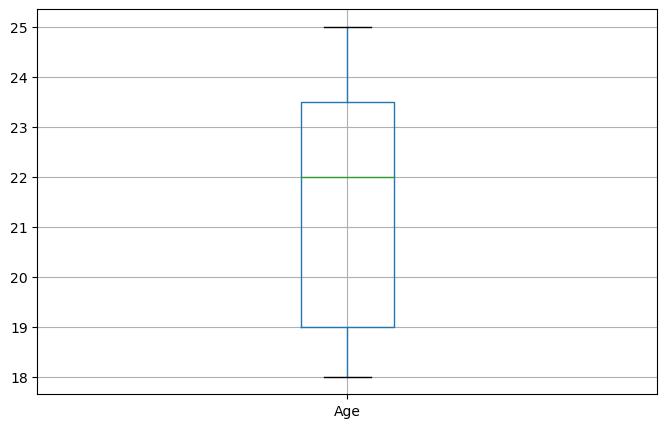

In [72]:
df[numeric_columns].boxplot(figsize=(8, 5))
plt.show()


Primary_App  Bumble  Hinge  OkCupid  Tinder
Gender                                     
Female           22     19       21      15
Male             19     21       27      17
Non-binary       14     25       19      20


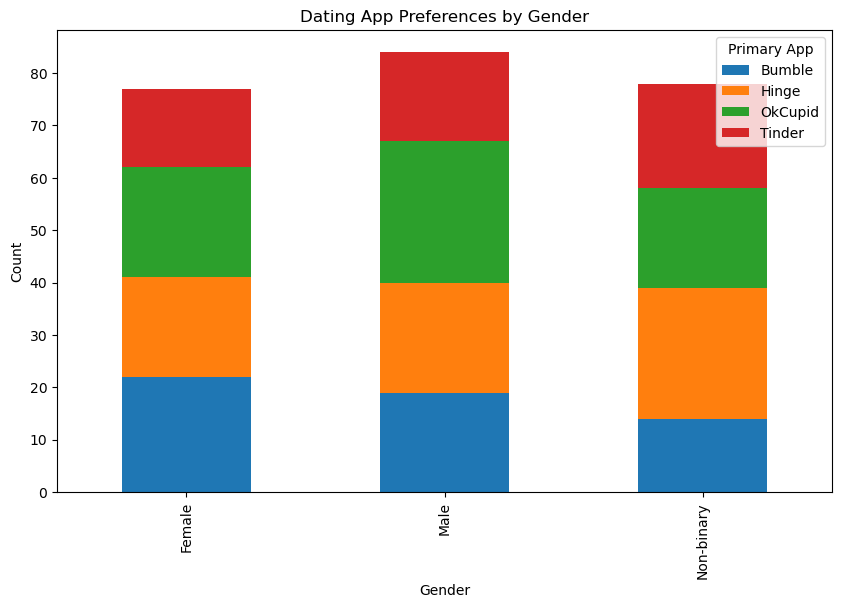

In [76]:
df.shape

(239, 16)

In [88]:
#Summarizing Data 
#Age

In [89]:
corr_matrix = df[['Age']].corr()

# Print correlation matrix
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
      Age
Age  1.0


Age
18    30
19    33
20    26
21    28
22    33
23    29
24    38
25    22
Name: count, dtype: int64


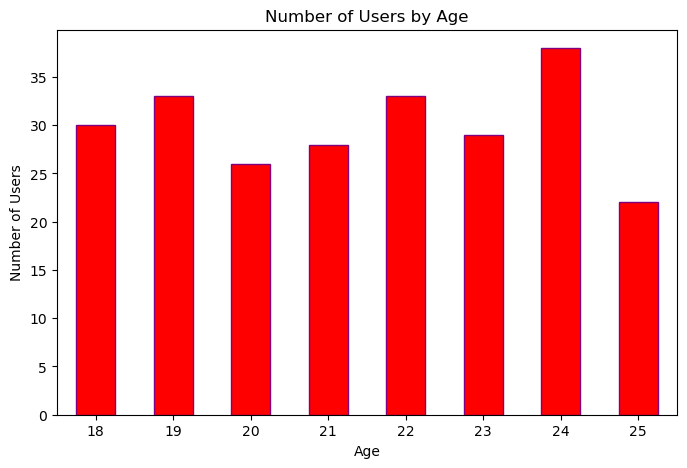

In [90]:

age_groups = df['Age'].value_counts().sort_index()
print(age_groups)
age_groups.plot(kind='bar', figsize=(8, 5), color='red', edgecolor='purple')
plt.title("Number of Users by Age")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.show()


In [93]:
#pivot table
age_pivot = df.pivot_table(index='Age', columns='Primary_App', aggfunc='size', fill_value=0)
print(age_pivot)


Primary_App  Bumble  Hinge  OkCupid  Tinder
Age                                        
18                7      6        8       9
19                7      7       12       7
20                4     12        7       3
21               12      7        5       4
22                7      9        8       9
23                2      9       12       6
24               11      9        9       9
25                5      6        6       5


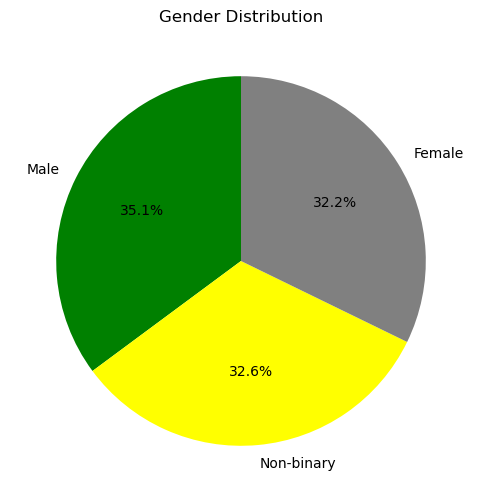

In [86]:
#gender distribution
gender_groups = df['Gender'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(gender_groups, labels=gender_groups.index, autopct='%1.1f%%', colors=['green', 'yellow', 'gray'], startangle=90)
plt.title("Gender Distribution")
plt.show()


Primary_App  Bumble  Hinge  OkCupid  Tinder
Gender                                     
Female           22     19       21      15
Male             19     21       27      17
Non-binary       14     25       19      20


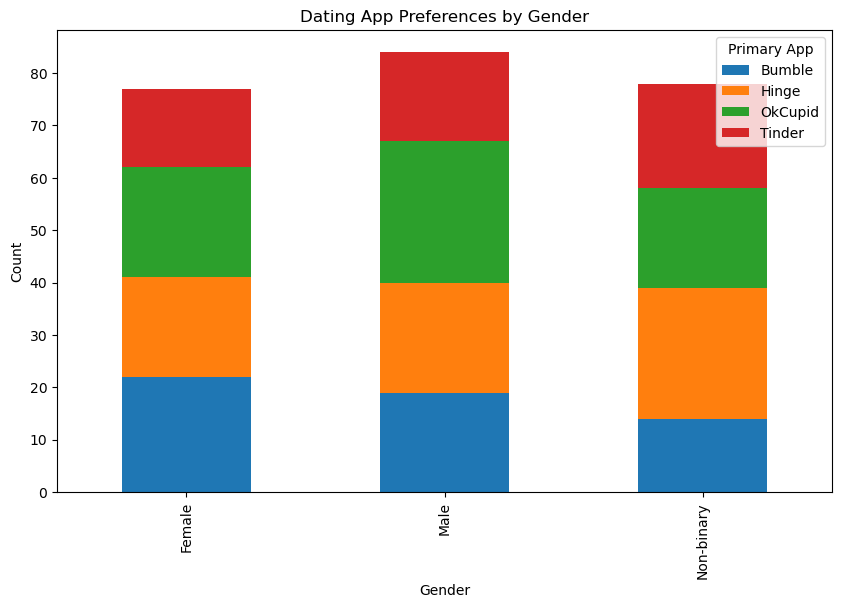

In [94]:
#dating app usage by gender
#Apps prefers be
primary_app_gender_preference = df.pivot_table(index='Gender', columns='Primary_App', aggfunc='size', fill_value=0)
print(primary_app_gender_preference)
primary_app_gender_preference.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Dating App Preferences by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Primary App")
plt.show()
#over reprsented groups =male
#under repseneted groups = Non-binary

Location
Bangalore    31
Chennai      36
Delhi        35
Hyderabad    29
Kolkata      37
Mumbai       38
Pune         33
Name: User_ID, dtype: int64


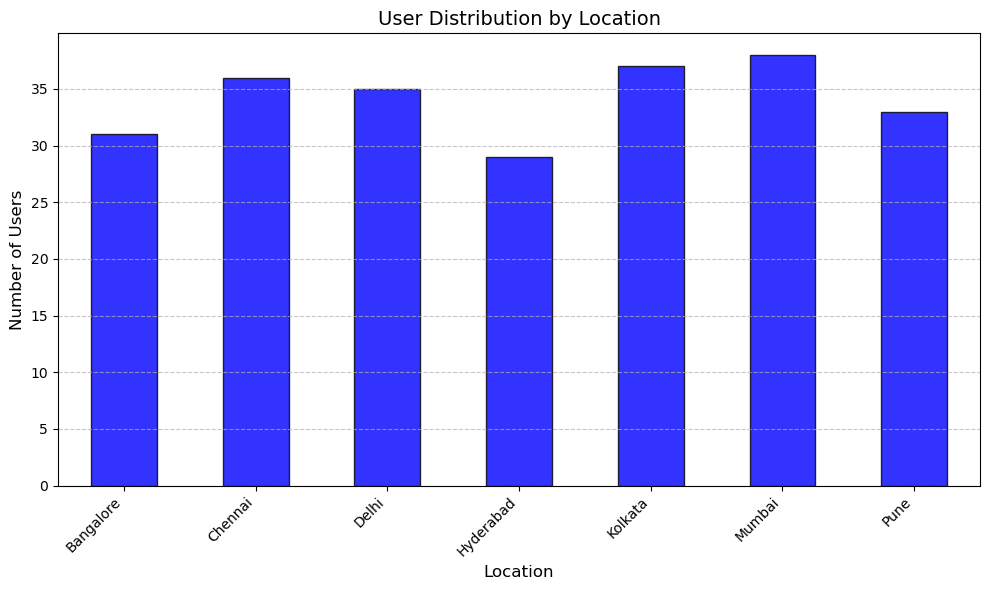

In [98]:
#Location
location_summary = df.groupby('Location')['User_ID'].count()
print(location_summary)

location_summary.plot(kind='bar', figsize=(10, 6), color='blue', edgecolor='black', alpha=0.8)
plt.title('User Distribution by Location', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

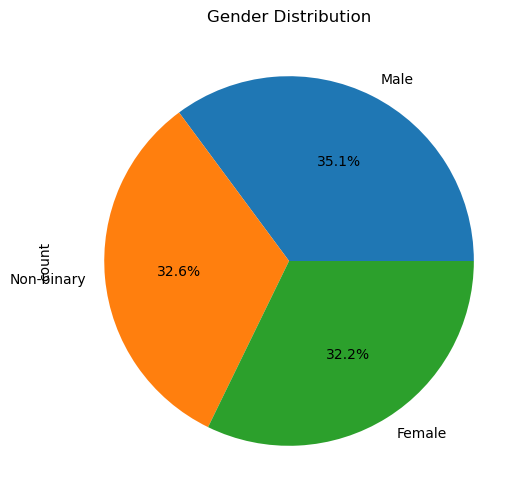

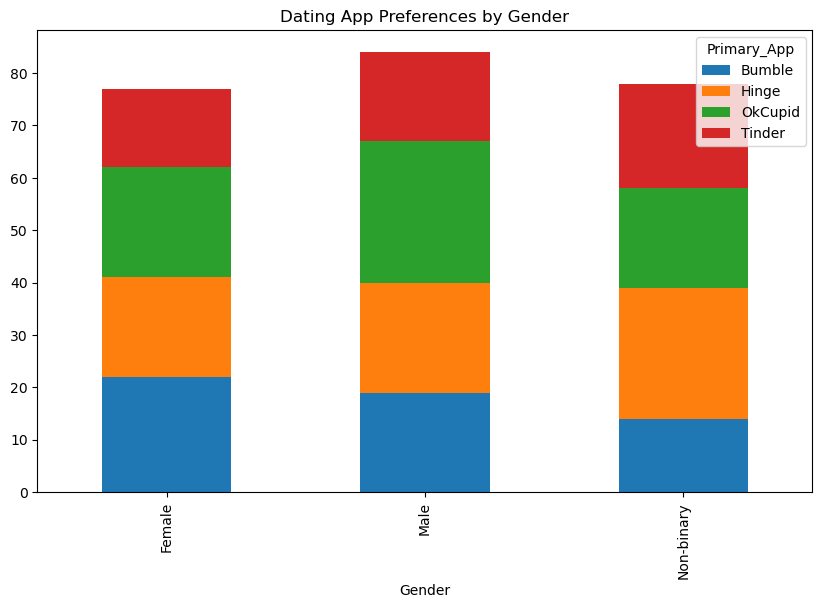

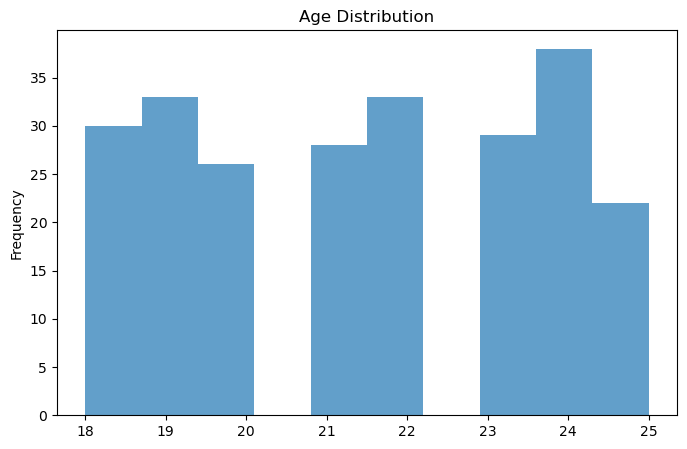

In [105]:
df['Age'].plot(kind='hist', bins=10, alpha=0.7, figsize=(8,5), title='Age Distribution')
plt.show()



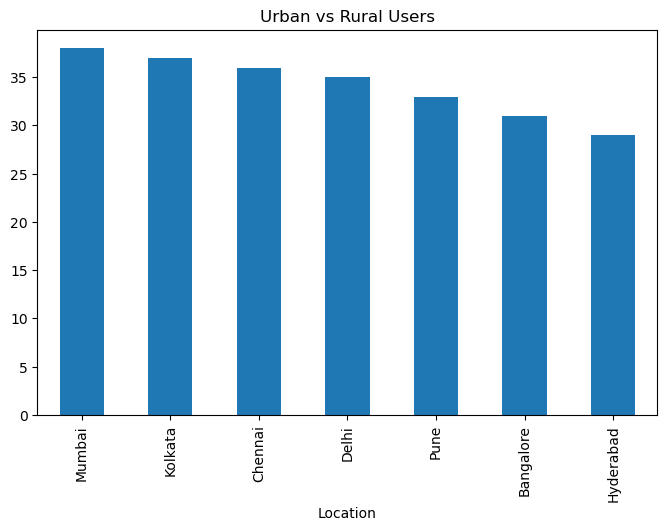

In [106]:

df['Location'].value_counts().plot(kind='bar', figsize=(8,5), title='Urban vs Rural Users')
plt.show()

In [108]:
df['Location'].value_counts()

#All the locations are urban locations

Location
Mumbai       38
Kolkata      37
Chennai      36
Delhi        35
Pune         33
Bangalore    31
Hyderabad    29
Name: count, dtype: int64

In [109]:
#Task 5: Temporal & Regional Trends (30 mins) 
#Objective: Analyze how dating app usage changes over time and location. 

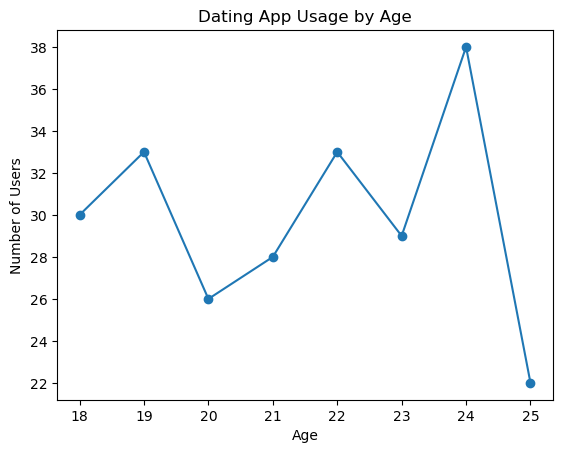

In [111]:
#App usage by Age
age_trend = df.groupby('Age')['Primary_App'].count()
age_trend.plot(kind='line', marker='o', title="Dating App Usage by Age")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()


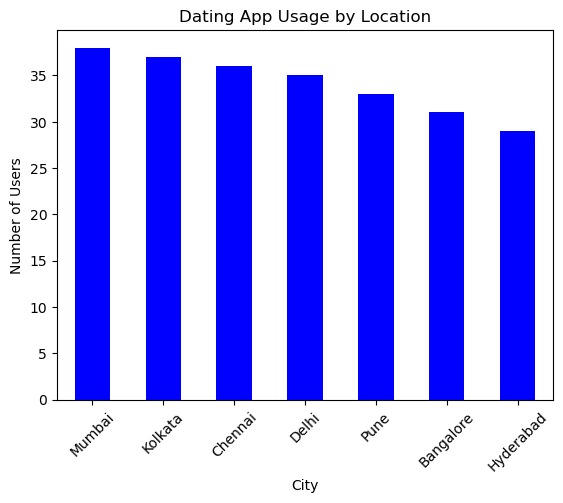

In [113]:
#App usage by location
location_trend = df['Location'].value_counts()
location_trend.plot(kind='bar', title="Dating App Usage by Location", color='blue')
plt.xlabel("City")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.show()



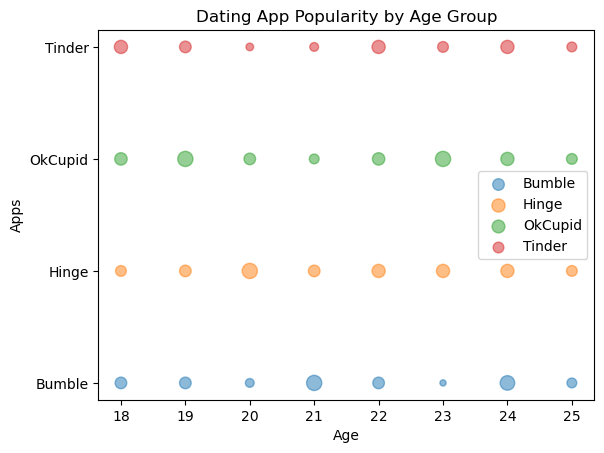

In [115]:
#App popularity based on age
#Bubble chart
app_popularity_trend = df.pivot_table(index='Age', columns='Primary_App', aggfunc='size', fill_value=0)
for app in app_popularity_trend.columns:
    plt.scatter(app_popularity_trend.index, [app] * len(app_popularity_trend), s=app_popularity_trend[app]*10, label=app, alpha=0.5)

plt.xlabel("Age")
plt.ylabel("Apps")
plt.title("Dating App Popularity by Age Group")
plt.legend()
plt.show()


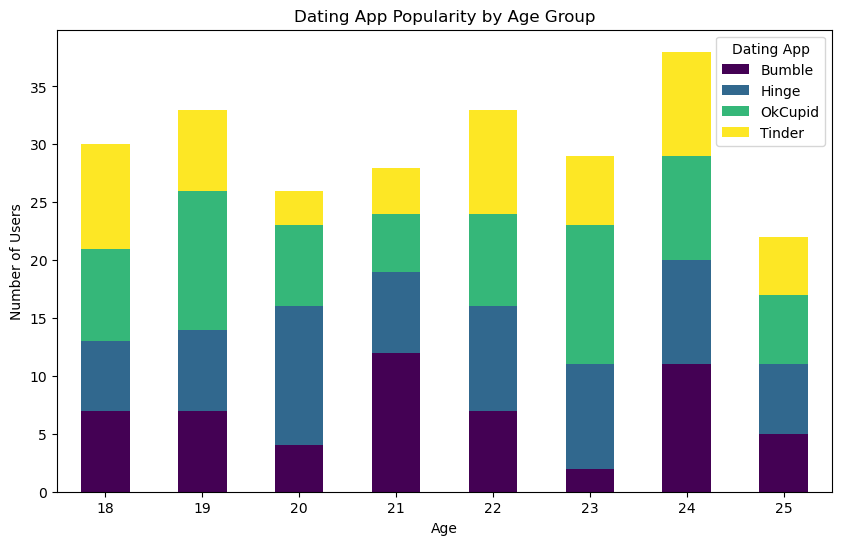

In [116]:
#Bar Chart
app_popularity_trend.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', title="Dating App Popularity by Age Group")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.legend(title="Dating App", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()
